<H1 style="color:SlateBlue;"> GRIP: The Sparks Foundation </H1>

<b> Data Science and Business Analytics Internship </b>

<b> Task two: Prediction Using Unsupervised Machine Learning</b>

<b> Submitted by Sagar Das </b>

<H3 style="color:SlateBlue;">From the ‘Iris’ dataset, predicting the optimum number of clusters
and representing it visually.</H3> 

<H3 style="color:Crimson;"> Loading Required Python Libraries </H3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline
print("Libraries loaded!")

Libraries loaded!


<h3 style="color:Crimson;"> Now Let us load and read the dataset</h3>

In [2]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns= data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


<B> So, there are no missing values. </B>

<h3 style="color:Crimson;">The Elbow method</h3>

<b> Let us use the elbow method to find the optimum number of clusters. </b>

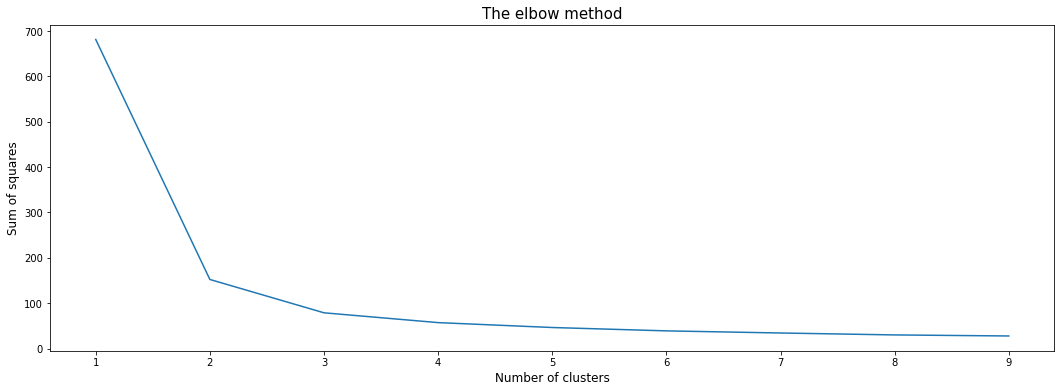

In [4]:
X= df.values
sse = []
no_of_clusters= range(1,10)
for k in no_of_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(18,6))
plt.plot(no_of_clusters,sse)    
plt.title("The elbow method",fontsize=15)
plt.xlabel("Number of clusters",fontsize=12)
plt.ylabel("Sum of squares",fontsize=12)
plt.show()

<B> So, the optimum number of clusters is 3 </B>

<h3 style="color:Crimson;">Dividing the data into 3 clusters.</h3>

In [5]:
kmeans_result = KMeans(n_clusters=3, random_state=45)
result = kmeans_result.fit_predict(X)
df["cluster"]=result
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [6]:
kmeans_result.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

<B> It is evident that, each center has four co-ordinates, so we can not visualize them properly with help of 2d or 3d plots. </B>

<h3 style="color:Crimson;">Visualization in 2D</h3>

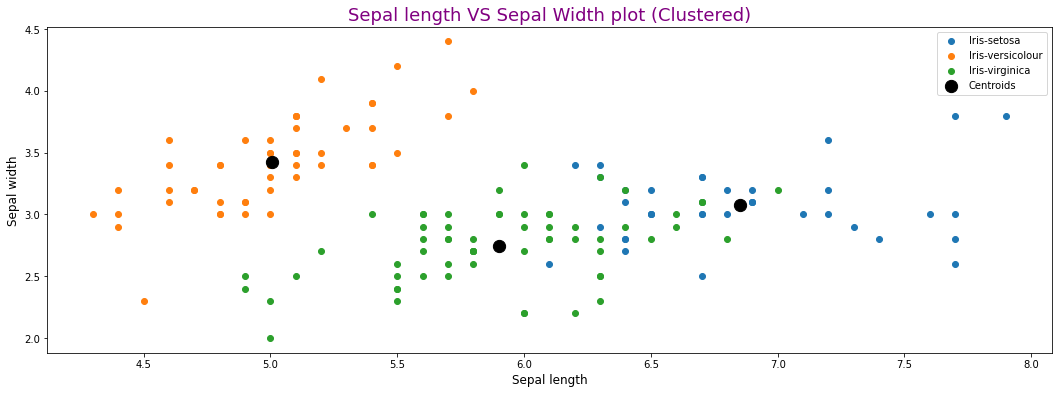

In [7]:
df1= df[df["cluster"]==0]
df2= df[df["cluster"]==1]
df3= df[df["cluster"]==2]
plt.figure(figsize=(18,6))
plt.scatter(x=df1["sepal length (cm)"], y=df1["sepal width (cm)"],label = 'Iris-setosa')
plt.scatter(x=df2["sepal length (cm)"], y=df2["sepal width (cm)"],label = 'Iris-versicolour')
plt.scatter(x=df3["sepal length (cm)"], y=df3["sepal width (cm)"],label = 'Iris-virginica')
plt.scatter(x=kmeans_result.cluster_centers_[:,0],y=kmeans_result.cluster_centers_[:,1],label="Centroids",c='black',s=150)
plt.title("Sepal length VS Sepal Width plot (Clustered)", fontsize=18,color = 'purple')
plt.xlabel("Sepal length", fontsize =12)
plt.ylabel("Sepal width", fontsize =12)
plt.legend()
plt.show()

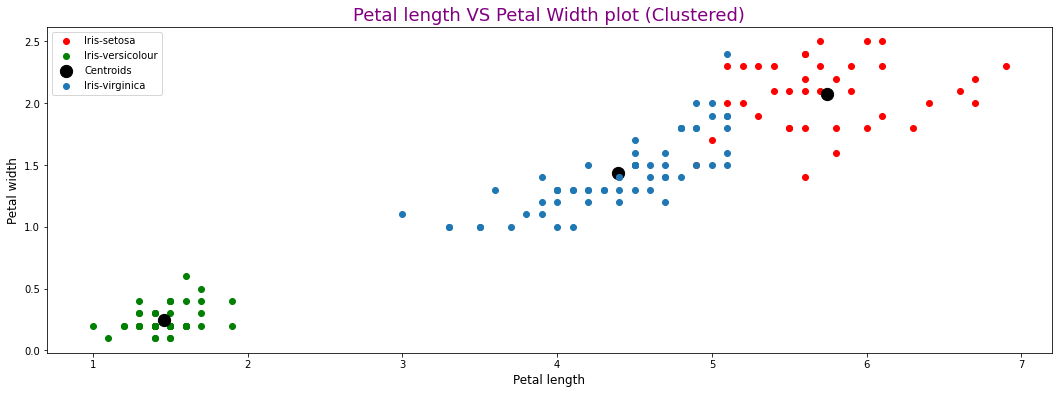

In [8]:
df1= df[df["cluster"]==0]
df2= df[df["cluster"]==1]
df3= df[df["cluster"]==2]
plt.figure(figsize=(18,6))
plt.scatter(x=df1["petal length (cm)"], y=df1["petal width (cm)"],color="red",label = 'Iris-setosa')
plt.scatter(x=df2["petal length (cm)"], y=df2["petal width (cm)"],color="green",label = 'Iris-versicolour')
plt.scatter(x=kmeans_result.cluster_centers_[:,2],y=kmeans_result.cluster_centers_[:,3],label="Centroids",c='black',s=150)
plt.scatter(x=df3["petal length (cm)"], y=df3["petal width (cm)"],label = 'Iris-virginica')
plt.title("Petal length VS Petal Width plot (Clustered)", fontsize=18,color = 'purple')
plt.xlabel("Petal length", fontsize =12)
plt.ylabel("Petal width", fontsize =12)
plt.legend()
plt.show()

<h3 style="color:Crimson;"> Clustering only on Sepal length and width </h3>

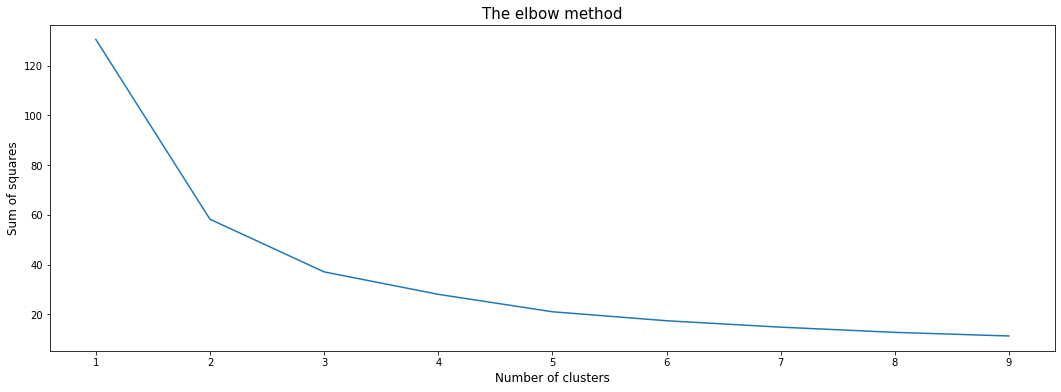

In [9]:
Y= df[["sepal length (cm)","sepal width (cm)"]].values
sse = []
no_of_clusters= range(1,10)
for k in no_of_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Y)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(18,6))
plt.plot(no_of_clusters,sse)    
plt.title("The elbow method",fontsize=15)
plt.xlabel("Number of clusters",fontsize=12)
plt.ylabel("Sum of squares",fontsize=12)
plt.show()

<B> So, the optimum number of clusters is 3 </B>

In [10]:
#Clustering

kmeans_result_1 = KMeans(n_clusters=3, random_state=45)
result_1 = kmeans_result_1.fit_predict(Y)
df["cluster1"]=result_1
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,cluster1
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1


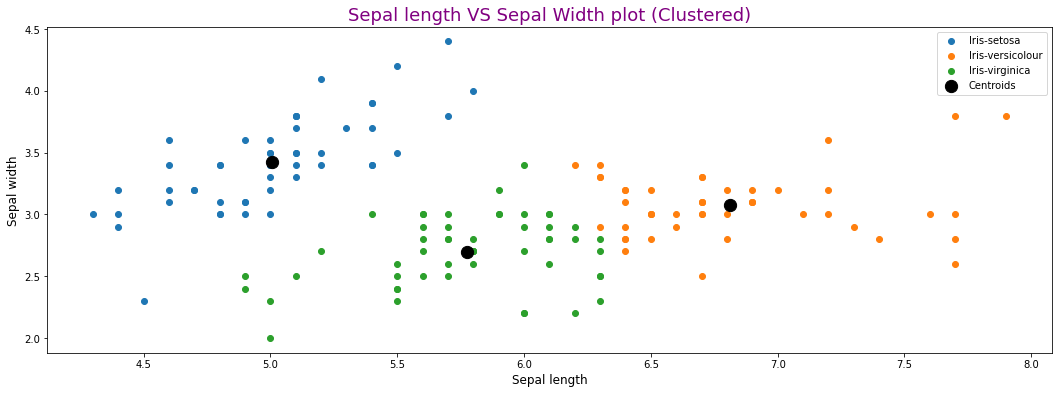

In [11]:
#Visualizing

df1= df[df["cluster1"]==0]
df2= df[df["cluster1"]==1]
df3= df[df["cluster1"]==2]
plt.figure(figsize=(18,6))
plt.scatter(x=df1["sepal length (cm)"], y=df1["sepal width (cm)"],label = 'Iris-setosa')
plt.scatter(x=df2["sepal length (cm)"], y=df2["sepal width (cm)"],label = 'Iris-versicolour')
plt.scatter(x=df3["sepal length (cm)"], y=df3["sepal width (cm)"],label = 'Iris-virginica')
plt.scatter(x=kmeans_result_1.cluster_centers_[:,0] , y=kmeans_result_1.cluster_centers_[:,1],label="Centroids",c='black',s=150)
plt.title("Sepal length VS Sepal Width plot (Clustered)", fontsize=18,color = 'purple')
plt.xlabel("Sepal length", fontsize =12)
plt.ylabel("Sepal width", fontsize =12)
plt.legend()
plt.show()

<h3 style="color:Crimson;"> Clustering only on Petal length and width </h3>

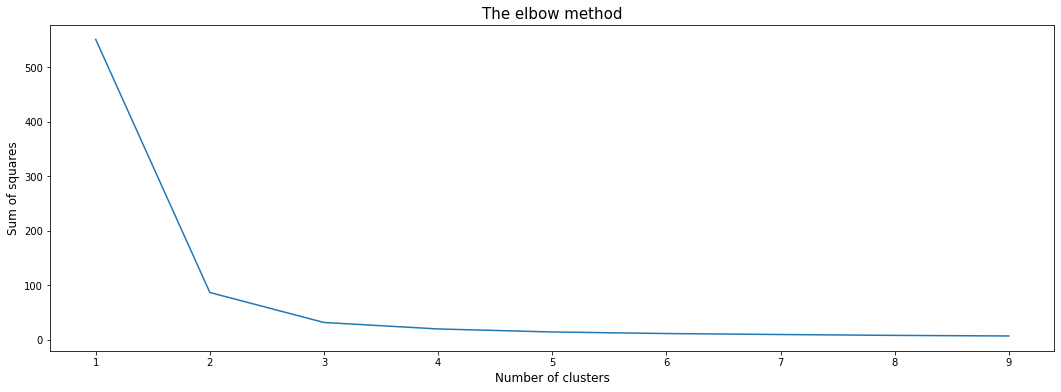

In [12]:
Z= df[["petal length (cm)","petal width (cm)"]].values
sse = []
no_of_clusters= range(1,10)
for k in no_of_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Z)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(18,6))
plt.plot(no_of_clusters,sse)    
plt.title("The elbow method",fontsize=15)
plt.xlabel("Number of clusters",fontsize=12)
plt.ylabel("Sum of squares",fontsize=12)
plt.show()

<B> So, the optimum number of clusters is 3 </B>

In [13]:
#Clustering

kmeans_result_2 = KMeans(n_clusters=3, random_state=45)
result2 = kmeans_result_2.fit_predict(Z)
df["cluster2"]=result2
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,cluster1,cluster2
0,5.1,3.5,1.4,0.2,1,0,1
1,4.9,3.0,1.4,0.2,1,0,1
2,4.7,3.2,1.3,0.2,1,0,1
3,4.6,3.1,1.5,0.2,1,0,1
4,5.0,3.6,1.4,0.2,1,0,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1,2
146,6.3,2.5,5.0,1.9,2,2,2
147,6.5,3.0,5.2,2.0,0,1,2
148,6.2,3.4,5.4,2.3,0,1,2


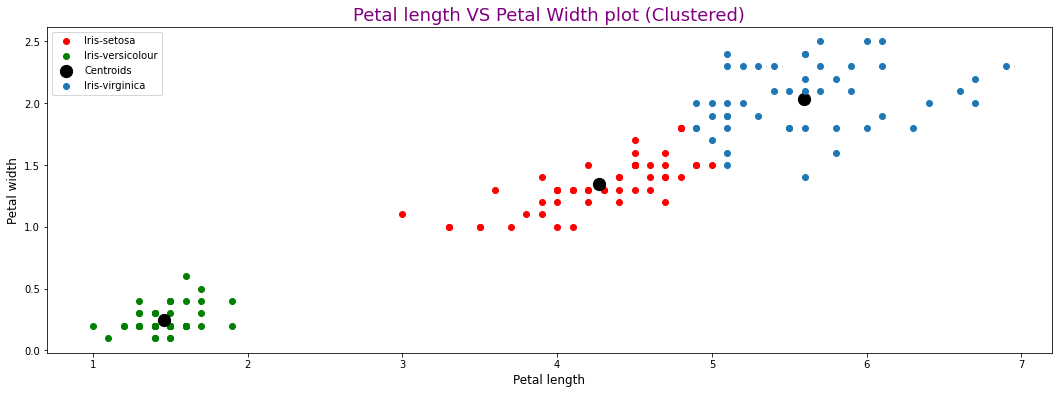

In [14]:
#Visualization

df1= df[df["cluster2"]==0]
df2= df[df["cluster2"]==1]
df3= df[df["cluster2"]==2]
plt.figure(figsize=(18,6))
plt.scatter(x=df1["petal length (cm)"], y=df1["petal width (cm)"],color="red",label = 'Iris-setosa')
plt.scatter(x=df2["petal length (cm)"], y=df2["petal width (cm)"],color="green",label = 'Iris-versicolour')
plt.scatter(x=kmeans_result_2.cluster_centers_[:,0],y=kmeans_result_2.cluster_centers_[:,1],label="Centroids",c='black',s=150)
plt.scatter(x=df3["petal length (cm)"], y=df3["petal width (cm)"],label = 'Iris-virginica')
plt.title("Petal length VS Petal Width plot (Clustered)", fontsize=18,color="purple")
plt.xlabel("Petal length", fontsize =12)
plt.ylabel("Petal width", fontsize =12)
plt.legend()
plt.show()